In [1]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [4]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [5]:
data.fillna(0, inplace=True)

In [6]:
data.describe()
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

In [7]:
price = data.priceUSD * 10000
print(price)

0            495.0
1            726.0
2            859.0
3            783.0
4            767.0
           ...    
3483    93490000.0
3484    93940000.0
3485    93660000.0
3486    93930000.0
3487    93980000.0
Name: priceUSD, Length: 3488, dtype: float64


In [8]:
test_data=pd.read_csv('C:/Users/User/machine_learning/data/btc_testdata.csv')

In [9]:
test_data.head()
test_prices = (test_data['High']+test_data['Low'])/2

In [10]:
test_prices = test_prices * 10000
print(test_prices)

0       93945000.0
1       92220400.0
2       94325000.0
3       96822200.0
4       97803600.0
          ...     
465    491554300.0
466    501533500.0
467    486519050.0
468    468416950.0
469    444154250.0
Length: 470, dtype: float64


In [11]:
prices = []
prices.extend(price.astype(np.int64))
prices.extend(test_prices.astype(np.int64))
print(prices)

[495, 726, 859, 783, 767, 649, 566, 581, 530, 530, 580, 595, 648, 663, 664, 611, 613, 600, 597, 596, 622, 599, 600, 660, 690, 635, 690, 655, 663, 661, 643, 678, 690, 673, 661, 660, 655, 655, 650, 656, 644, 645, 646, 644, 648, 621, 625, 622, 609, 618, 620, 622, 613, 615, 611, 614, 628, 618, 621, 620, 615, 619, 599, 600, 618, 621, 629, 623, 622, 621, 621, 620, 621, 619, 620, 618, 619, 616, 613, 612, 614, 622, 651, 769, 884, 948, 930, 945, 985, 1030, 1030, 1010, 1019, 1030, 985, 995, 1019, 1050, 1070, 1120, 1110, 1419, 1690, 1790, 1850, 1930, 1930, 1940, 1930, 1930, 2140, 2350, 3260, 4050, 2940, 2370, 2250, 2270, 2490, 2819, 2780, 2740, 2460, 2260, 2450, 2740, 2819, 2770, 2800, 2829, 2829, 2810, 2819, 2839, 2770, 2540, 2190, 2190, 2420, 2510, 2300, 2050, 2150, 2130, 2390, 2130, 2020, 2160, 2140, 2200, 2380, 2420, 2440, 2450, 2450, 2440, 2540, 2500, 2470, 2490, 2490, 2490, 2570, 2580, 2720, 2859, 2960, 3000, 2960, 2970, 2930, 2970, 2940, 2990, 3090, 3160, 3230, 3250, 3270, 3230, 3180, 3590

In [83]:
seq_len = 32

In [84]:
seq_prices = []
pre_prices = []
gradient_prices = []
sgrad_prices = []
pgrad_prices = []
i=1
for i in range(len(prices)-1):
    gradient_prices.append(prices[i+1]/prices[i])
    i=i+1
 
j = 1
for j in range(len(prices) - seq_len-1):
    seq_prices.append(prices[j:j+seq_len])
    pre_prices.append(prices[j+seq_len+1])
    sgrad_prices.append(gradient_prices[j:j+seq_len-1])
    pgrad_prices.append(gradient_prices[j+seq_len])
    j=j+1

In [85]:
train_seq_prices = seq_prices[:int(len(seq_prices)*0.75)]
train_pre_prices = pre_prices[:int(len(seq_prices)*0.75)]
test_seq_prices = seq_prices[int(len(seq_prices)*0.75) + 1:]
test_pre_prices = pre_prices[int(len(seq_prices)*0.75) + 1:]

train_sgrad_prices = sgrad_prices[:int(len(sgrad_prices)*0.75)]
train_pgrad_prices = pgrad_prices[:int(len(sgrad_prices)*0.75)]
test_sgrad_prices = sgrad_prices[int(len(sgrad_prices)*0.75) + 1:]
test_pgrad_prices = pgrad_prices[int(len(sgrad_prices)*0.75) + 1:]

print(len(train_pgrad_prices))
print(len(test_pgrad_prices))
print(len(train_sgrad_prices))
print(len(test_sgrad_prices))
print(train_sgrad_prices)

2943
981
2943
981
[[1.4666666666666666, 1.1831955922865014, 0.9115250291036089, 0.979565772669221, 0.8461538461538461, 0.8721109399075501, 1.0265017667844523, 0.9122203098106713, 1.0, 1.0943396226415094, 1.0258620689655173, 1.0890756302521007, 1.0231481481481481, 1.0015082956259427, 0.9201807228915663, 1.0032733224222585, 0.9787928221859706, 0.995, 0.998324958123953, 1.0436241610738255, 0.9630225080385852, 1.001669449081803, 1.1, 1.0454545454545454, 0.9202898550724637, 1.0866141732283465, 0.9492753623188406, 1.0122137404580154, 0.9969834087481146, 0.972768532526475, 1.0544323483670295], [1.1831955922865014, 0.9115250291036089, 0.979565772669221, 0.8461538461538461, 0.8721109399075501, 1.0265017667844523, 0.9122203098106713, 1.0, 1.0943396226415094, 1.0258620689655173, 1.0890756302521007, 1.0231481481481481, 1.0015082956259427, 0.9201807228915663, 1.0032733224222585, 0.9787928221859706, 0.995, 0.998324958123953, 1.0436241610738255, 0.9630225080385852, 1.001669449081803, 1.1, 1.045454545

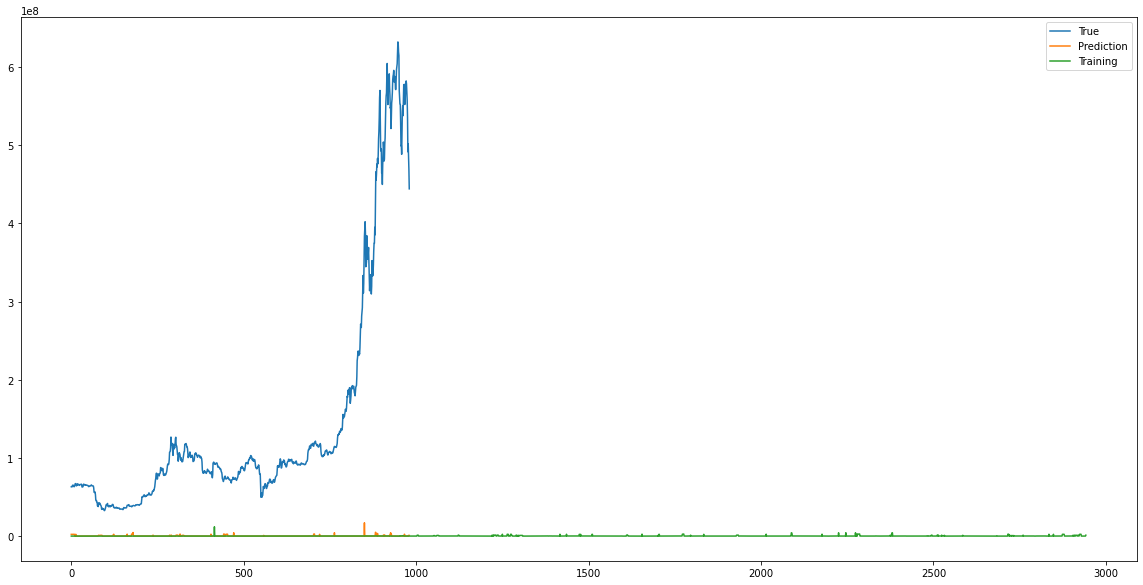

In [86]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_sgrad_prices, train_pre_prices)

pred = knn.predict(test_sgrad_prices)
pred_train = knn.predict(train_sgrad_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [87]:
print("훈련 세트 정확도: {:.3f}".format(knn.score(train_sgrad_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(knn.score(test_sgrad_prices, test_pre_prices)))

훈련 세트 정확도: 0.155
테스트 세트 정확도: 0.000


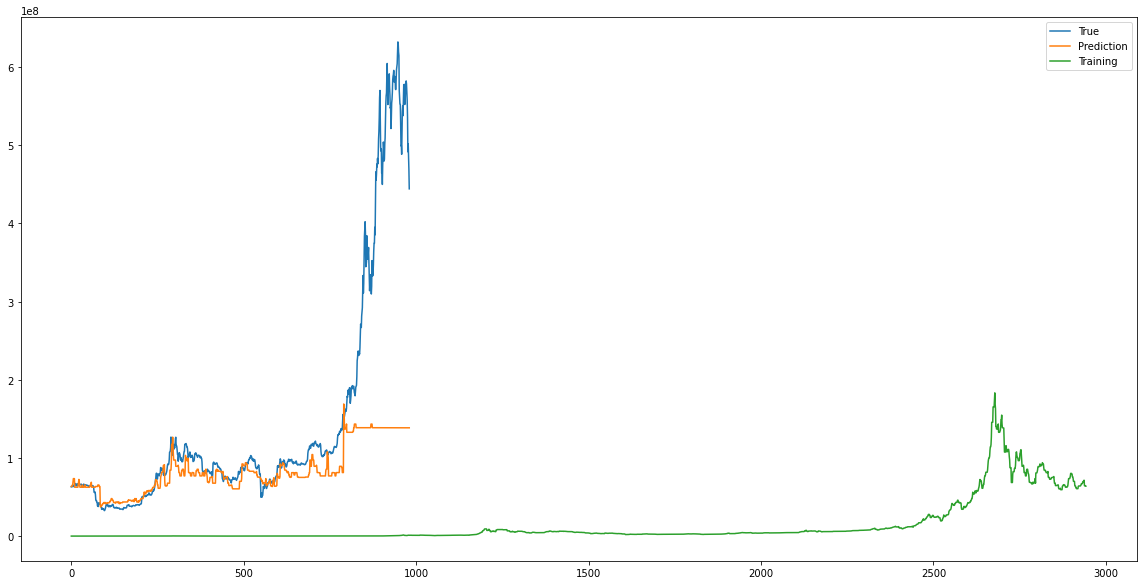

In [88]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_seq_prices, train_pre_prices)

pred = knn.predict(test_seq_prices)
pred_train = knn.predict(train_seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [89]:
print("훈련 세트 정확도: {:.3f}".format(knn.score(train_seq_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(knn.score(test_seq_prices, test_pre_prices)))

훈련 세트 정확도: 0.159
테스트 세트 정확도: 0.000


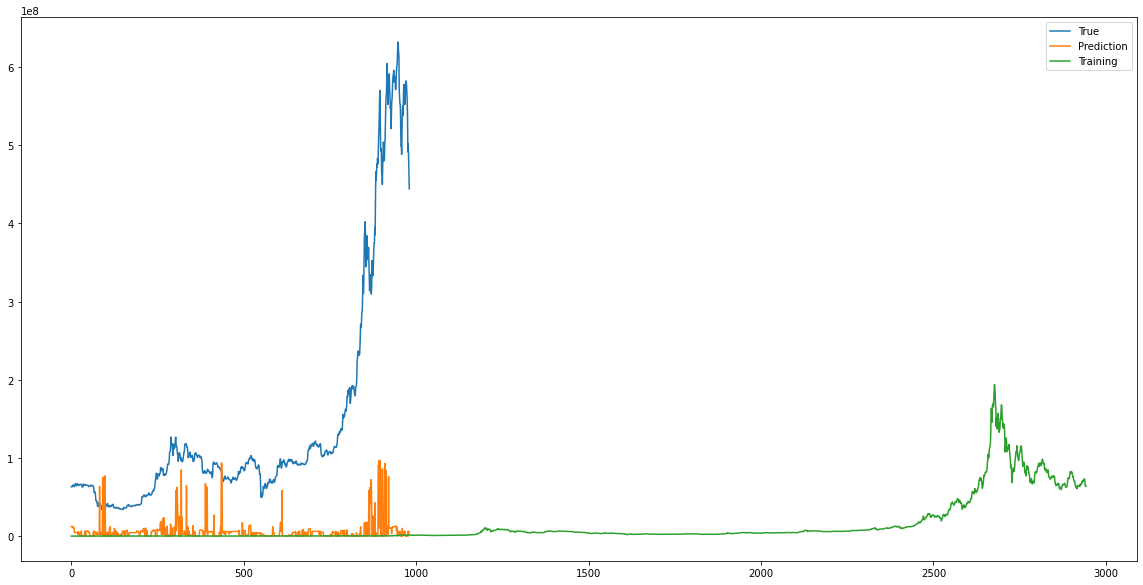

In [90]:
svc = SVC(C=10000)
svc.fit(train_sgrad_prices, train_pre_prices)

pred = svc.predict(test_sgrad_prices)
pred_train = svc.predict(train_sgrad_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [91]:
print("훈련 세트 정확도: {:.3f}".format(svc.score(train_sgrad_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(test_sgrad_prices, test_pre_prices)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.000


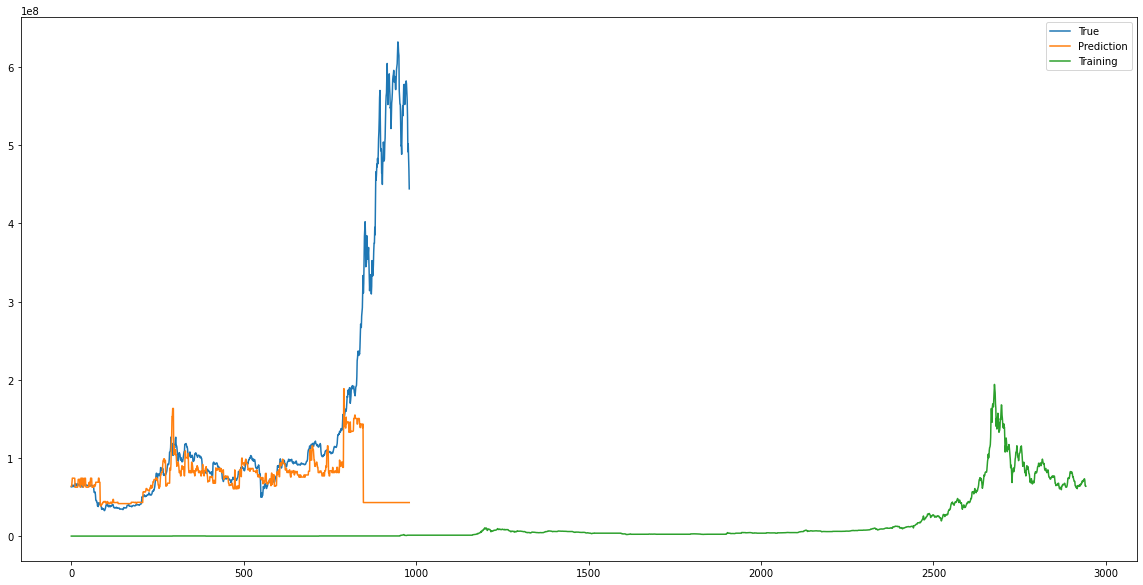

In [92]:
svc = SVC(C=3000)
svc.fit(train_seq_prices, train_pre_prices)

pred = svc.predict(test_seq_prices)
pred_train = svc.predict(train_seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.plot(pred_train, label='Training')
ax.legend()
plt.show()

In [93]:
print("훈련 세트 정확도: {:.3f}".format(svc.score(train_seq_prices, train_pre_prices)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(test_seq_prices, test_pre_prices)))

훈련 세트 정확도: 0.487
테스트 세트 정확도: 0.000
